In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

loandf = pd.read_csv(r"C:\Users\Admin\Documents\cpython\LendingClubCaseStudy\loan.csv", header = 0)
loandf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [216]:
loandf.shape

(39717, 111)

In [217]:
loandf.isnull().all(axis=0).sum()

54

In [218]:
loandf.isnull().all(axis=1).sum()

0

In [219]:
# pd.set_option("max_columns", None) # show all cols
# pd.set_option('max_colwidth', None) # show full width of showing cols
# pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be
# pd.options.display.max_seq_items = 200000
pd.options.display.max_rows = 400000

In [220]:
colvalcnt= loandf.isnull().sum()

In [221]:
print(colvalcnt.sort_values())

id                                    0
earliest_cr_line                      0
inq_last_6mths                        0
open_acc                              0
pub_rec                               0
revol_bal                             0
total_acc                             0
initial_list_status                   0
out_prncp                             0
out_prncp_inv                         0
delinq_2yrs                           0
total_pymnt                           0
total_rec_int                         0
total_rec_late_fee                    0
recoveries                            0
collection_recovery_fee               0
last_pymnt_amnt                       0
policy_code                           0
application_type                      0
acc_now_delinq                        0
delinq_amnt                           0
total_pymnt_inv                       0
dti                                   0
total_rec_prncp                       0
zip_code                              0


In [222]:
loandf.drop(columns=list(colvalcnt[colvalcnt.values > 12000].index), inplace=True)

In [223]:
loandf.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [224]:
loandf.shape

(39717, 53)

In [225]:
loandf.shape

(39717, 53)

In [226]:
distinctone=loandf.nunique()
print(distinctone)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [227]:

loandf.drop(columns=list(distinctone[distinctone.values == 1].index), inplace=True)


In [228]:
loandf.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [229]:
loandf.shape

(39717, 44)

In [230]:
dropcol=["id","member_id","title", "last_credit_pull_d"]
loandf.drop(columns=dropcol, inplace=True)

In [231]:
dropcol1=["zip_code","url","out_prncp","out_prncp_inv","total_rec_prncp","total_rec_int","total_rec_late_fee"]
loandf.drop(columns=dropcol1, inplace=True)

In [232]:
loandf.shape

(39717, 33)

In [233]:
loandf['int_rate']=loandf['int_rate'].str.rstrip('%')

In [234]:
loandf['int_rate']=loandf['int_rate'].apply(pd.to_numeric).astype(float)

In [235]:
loandf['loan_amnt']=loandf['loan_amnt'].apply(pd.to_numeric).astype(float)
loandf['funded_amnt']=loandf['funded_amnt'].apply(pd.to_numeric).astype(float)

In [237]:
#Removing current loan status rows
loandf = loandf[loandf.loan_status != 'Current']
#Checking unique values for term column
loandf.term.unique()

#Stripping empty space in values in term
loandf['term'] = loandf.term.str.strip()
loandf.term.unique()


array(['36 months', '60 months'], dtype=object)

In [238]:
loandf.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,13648,83.70%,9,5863.155187,5833.84,0.00,0.00,Jan-15,171.62,0.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,1687,9.40%,4,1008.710000,1008.71,117.08,1.11,Apr-13,119.66,0.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,2956,98.50%,10,3005.666844,3005.67,0.00,0.00,Jun-14,649.91,0.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,5598,21%,37,12231.890000,12231.89,0.00,0.00,Jan-15,357.48,0.0
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,7963,28.30%,12,5632.210000,5632.21,0.00,0.00,Jan-15,161.03,0.0


In [239]:
#loandf.info

<Axes: >

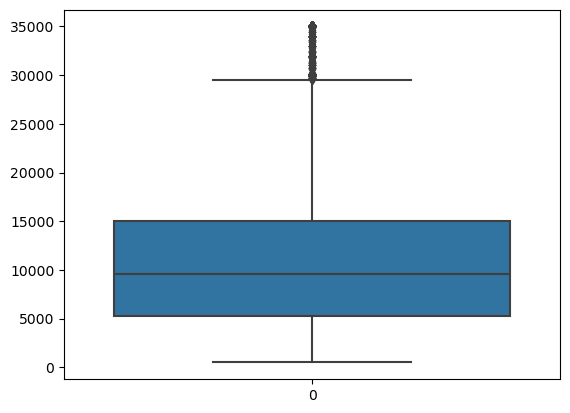

In [240]:
sns.boxplot(loandf.loan_amnt)

In [241]:
loandf["loan_amnt"].describe()



count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [242]:
loandf.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [243]:
loandf.dtypes

loan_amnt                  float64
funded_amnt                float64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
total_pymnt                float64
total_pymnt_inv            float64
recoveries          

In [244]:
loandf.shape

(38577, 33)

In [245]:
# Bivariate on purpose against Chargedoff.
df = loandf.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=loandf, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')

KeyError: 'Column not found: id'